In [28]:
import pandas as pd
stations = pd.read_csv('2017-Q2/HealthyRideStations2017.csv',encoding='iso-8859-1')
stations.head()

,Station #,Station Name,# of Racks,Latitude,Longitude
0,1000,Liberty Ave & Stanwix St,16,40.441326,-80.004679
1,1001,Forbes Ave & Market Square,19,40.440877,-80.003080
2,1002,Third Ave & Wood St,15,40.439030,-80.001860
3,1003,First Ave & Smithfield St (Art Institute),15,40.437200,-80.000375
4,1004,First Ave & B St (T Station),15,40.435887,-79.997102


In [2]:
import googlemaps

In [14]:
from my_secrets.keys import google_gmap
c = googlemaps.Client(key='')

In [29]:
pos = stations[['Latitude','Longitude']].values.tolist()
elev = [d['elevation'] for d in c.elevation(pos)]
stations['elevation'] = elev

In [30]:
stations.head()

,Station #,Station Name,# of Racks,Latitude,Longitude,elevation
0,1000,Liberty Ave & Stanwix St,16,40.441326,-80.004679,222.900436
1,1001,Forbes Ave & Market Square,19,40.440877,-80.003080,225.133804
2,1002,Third Ave & Wood St,15,40.439030,-80.001860,223.876450
3,1003,First Ave & Smithfield St (Art Institute),15,40.437200,-80.000375,227.476715
4,1004,First Ave & B St (T Station),15,40.435887,-79.997102,226.804764


In [31]:
q2 = pd.read_csv('2017-Q2/Healthy Ride Rentals 2017-Q2.csv', encoding='iso-8859-1')
q2.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype
0,27193394,4/1/2017 0:59,4/1/2017 1:43,70024,2659,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer
1,27193815,4/1/2017 1:43,4/1/2017 1:48,70353,284,1037,Frew St & Schenley Dr,1038,Boulevard of the Allies & Parkview Ave,Subscriber
2,27194749,4/1/2017 2:35,4/1/2017 3:01,70067,1576,1010,10th St & Penn Ave (David L. Lawrence Conventi...,1010,10th St & Penn Ave (David L. Lawrence Conventi...,Customer
3,27201194,4/1/2017 5:05,4/1/2017 7:46,70191,9695,1005,Forbes Ave & Grant St,1043,Coltart Ave & Forbes Ave,Customer
4,27203670,4/1/2017 5:35,4/1/2017 5:54,70353,1164,1038,Boulevard of the Allies & Parkview Ave,1047,S 22nd St & E Carson St,Subscriber


In [32]:
one_way = q2['From station id'] != q2['To station id']
one_way.head()

0     True
1     True
2    False
3     True
4     True
dtype: bool

In [34]:
t1 = q2.loc[one_way].merge(stations[['Station #', 'elevation']], left_on='From station id', right_on='Station #' )
t1 = t1.rename(columns={'elevation':'from'})
t1.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,Station #,from
0,27193394,4/1/2017 0:59,4/1/2017 1:43,70024,2659,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201
1,27273333,4/1/2017 15:30,4/1/2017 16:24,70240,3218,1012,North Shore Trail & Fort Duquesne Bridge,1018,37th St & Butler St,Subscriber,1012,222.690201
2,27273382,4/1/2017 15:31,4/1/2017 16:24,70239,3176,1012,North Shore Trail & Fort Duquesne Bridge,1018,37th St & Butler St,Customer,1012,222.690201
3,27348481,4/2/2017 12:26,4/2/2017 12:45,70473,1163,1012,North Shore Trail & Fort Duquesne Bridge,1008,Centre Ave & PPG Paints Arena,Customer,1012,222.690201
4,27357152,4/2/2017 13:32,4/2/2017 13:53,70146,1291,1012,North Shore Trail & Fort Duquesne Bridge,1017,21st St & Penn Ave,Customer,1012,222.690201


In [36]:
with_elevation = t1.merge(stations[['Station #', 'elevation']], left_on='To station id', right_on='Station #')
with_elevation = with_elevation.rename(columns={'elevation':'to'})
with_elevation.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,Station #_x,from,Station #_y,to
0,27193394,4/1/2017 0:59,4/1/2017 1:43,70024,2659,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261
1,28039944,4/14/2017 16:41,4/14/2017 17:21,70087,2379,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261
2,28040049,4/14/2017 16:49,4/14/2017 17:20,70203,1892,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261
3,28239950,4/21/2017 14:55,4/21/2017 15:51,70248,3371,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261
4,28239974,4/21/2017 14:56,4/21/2017 15:51,70232,3324,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261


In [37]:
with_elevation['difference'] = with_elevation['to'] - with_elevation['from']
with_elevation.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,Station #_x,from,Station #_y,to,difference
0,27193394,4/1/2017 0:59,4/1/2017 1:43,70024,2659,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261,6.04306
1,28039944,4/14/2017 16:41,4/14/2017 17:21,70087,2379,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261,6.04306
2,28040049,4/14/2017 16:49,4/14/2017 17:20,70203,1892,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261,6.04306
3,28239950,4/21/2017 14:55,4/21/2017 15:51,70248,3371,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261,6.04306
4,28239974,4/21/2017 14:56,4/21/2017 15:51,70232,3324,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261,6.04306


In [41]:
import numpy as np
with_elevation.groupby(np.sign(with_elevation['difference']))['Trip id'].count()

difference
-1.0    9663
 1.0    7564
Name: Trip id, dtype: int64

In [45]:
from geopy.distance import vincenty

In [51]:
p1 = with_elevation.merge(stations[['Station #','Latitude','Longitude']], left_on='From station id', right_on='Station #')
p1 = p1.rename(columns={'Latitude':'f_lat','Longitude':'f_lon'})
p1.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,Station #_x,from,Station #_y,to,difference,Station #,f_lat,f_lon
0,27193394,4/1/2017 0:59,4/1/2017 1:43,70024,2659,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261,6.04306,1012,40.445834,-80.008882
1,28039944,4/14/2017 16:41,4/14/2017 17:21,70087,2379,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261,6.04306,1012,40.445834,-80.008882
2,28040049,4/14/2017 16:49,4/14/2017 17:20,70203,1892,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261,6.04306,1012,40.445834,-80.008882
3,28239950,4/21/2017 14:55,4/21/2017 15:51,70248,3371,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261,6.04306,1012,40.445834,-80.008882
4,28239974,4/21/2017 14:56,4/21/2017 15:51,70232,3324,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,1012,222.690201,1045,228.733261,6.04306,1012,40.445834,-80.008882


In [52]:
with_pos = p1.merge(stations[['Station #','Latitude','Longitude']], left_on='To station id', right_on='Station #')
with_pos = with_pos.rename(columns={'Latitude':'t_lat','Longitude':'t_lon'})
with_pos.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,...,from,Station #_y,to,difference,Station #_x,f_lat,f_lon,Station #_y,t_lat,t_lon
0,27193394,4/1/2017 0:59,4/1/2017 1:43,70024,2659,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,...,222.690201,1045,228.733261,6.04306,1012,40.445834,-80.008882,1045,40.427899,-79.966112
1,28039944,4/14/2017 16:41,4/14/2017 17:21,70087,2379,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,...,222.690201,1045,228.733261,6.04306,1012,40.445834,-80.008882,1045,40.427899,-79.966112
2,28040049,4/14/2017 16:49,4/14/2017 17:20,70203,1892,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,...,222.690201,1045,228.733261,6.04306,1012,40.445834,-80.008882,1045,40.427899,-79.966112
3,28239950,4/21/2017 14:55,4/21/2017 15:51,70248,3371,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,...,222.690201,1045,228.733261,6.04306,1012,40.445834,-80.008882,1045,40.427899,-79.966112
4,28239974,4/21/2017 14:56,4/21/2017 15:51,70232,3324,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,...,222.690201,1045,228.733261,6.04306,1012,40.445834,-80.008882,1045,40.427899,-79.966112


In [57]:
def distance(df):
    f = df[['f_lat','f_lon']].values.tolist()
    t = df[['t_lat','t_lon']].values.tolist()
    d = vincenty(f,t)
    return d.miles

In [58]:
distance(with_pos.loc[0])

2.5721550175822987

In [60]:
with_pos['distance'] = with_pos.apply(distance, axis='columns')

In [61]:
with_pos.head()

,Trip id,Starttime,Stoptime,Bikeid,Tripduration,From station id,From station name,To station id,To station name,Usertype,...,Station #_y,to,difference,Station #_x,f_lat,f_lon,Station #_y,t_lat,t_lon,distance
0,27193394,4/1/2017 0:59,4/1/2017 1:43,70024,2659,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,...,1045,228.733261,6.04306,1012,40.445834,-80.008882,1045,40.427899,-79.966112,2.572155
1,28039944,4/14/2017 16:41,4/14/2017 17:21,70087,2379,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,...,1045,228.733261,6.04306,1012,40.445834,-80.008882,1045,40.427899,-79.966112,2.572155
2,28040049,4/14/2017 16:49,4/14/2017 17:20,70203,1892,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,...,1045,228.733261,6.04306,1012,40.445834,-80.008882,1045,40.427899,-79.966112,2.572155
3,28239950,4/21/2017 14:55,4/21/2017 15:51,70248,3371,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,...,1045,228.733261,6.04306,1012,40.445834,-80.008882,1045,40.427899,-79.966112,2.572155
4,28239974,4/21/2017 14:56,4/21/2017 15:51,70232,3324,1012,North Shore Trail & Fort Duquesne Bridge,1045,S 27th St & Sidney St. (Southside Works),Customer,...,1045,228.733261,6.04306,1012,40.445834,-80.008882,1045,40.427899,-79.966112,2.572155


In [62]:
difficulty = with_pos['distance'] / with_pos['difference']
difficulty.head()

0    0.425638
1    0.425638
2    0.425638
3    0.425638
4    0.425638
dtype: float64

In [63]:
difficulty.describe()

count    17227.000000
mean        -0.031474
std          5.683789
min       -107.219958
25%         -0.245593
50%         -0.036777
75%          0.224742
max        107.219958
dtype: float64

In [64]:
%matplotlib inline

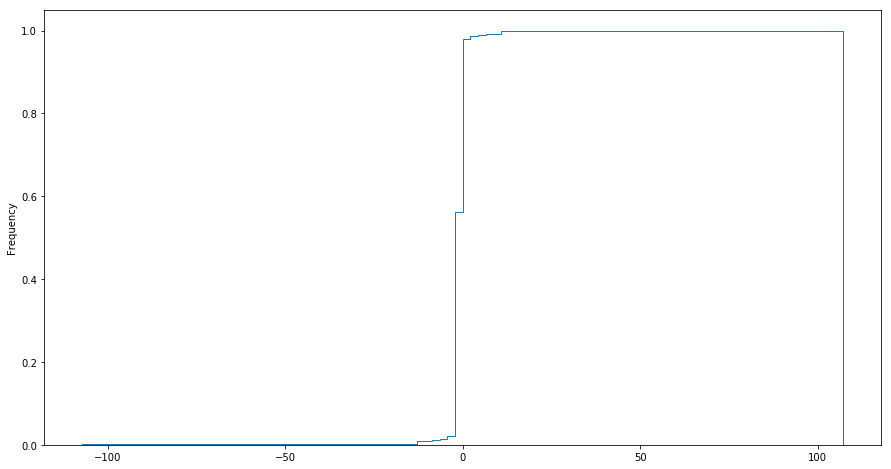

In [67]:
difficulty.plot.hist(bins=100, normed=True, cumulative=True, figsize=(15,8), histtype='step')

In [70]:
one_way = with_pos['From station id'] != with_pos['To station id']
with_pos['difficulty'] = difficulty
g = with_pos.loc[one_way].groupby(['From station id','To station id'])
popularity = g['Trip id'].count()
popularity.head()

From station id  To station id
1000             1001             90
                 1002             14
                 1003             33
                 1004              7
                 1005              5
Name: Trip id, dtype: int64

In [72]:
by_pair = g['difficulty'].first()
by_pair.head()

From station id  To station id
1000             1001             0.040212
                 1002             0.222557
                 1003             0.079552
                 1004             0.140381
                 1005             0.037477
Name: difficulty, dtype: float64

In [73]:
import matplotlib.pyplot as plt

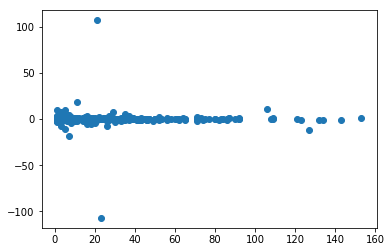

In [74]:
plt.scatter(popularity, by_pair)

In [78]:
by_pair.nlargest(3)

From station id  To station id
1047             1048             107.219958
1011             1016              18.113459
1001             1017              11.429483
Name: difficulty, dtype: float64

In [79]:
st = stations.set_index('Station #')
st.loc[[1047,1048]]

,Station Name,# of Racks,Latitude,Longitude,elevation
Station #,,,,,
1047,S 22nd St & E Carson St,19,40.428576,-79.974559,229.629272
1048,S 18th St & Sidney St,16,40.429338,-79.980684,229.632324
